# This notebook is used to create visuals in Geopandas

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import folium
import requests

from shapely.geometry import Point

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc

%matplotlib inline
pd.options.display.max_rows = 999

import warnings

warnings.filterwarnings("ignore","GeoSeries.isna", UserWarning)

[This resource](https://www.linkedin.com/pulse/geopandas-plotting-data-points-map-using-python-régis-nisengwe/) provided the link to the [following site](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.geom_type.html#geopandas.GeoSeries.geom_type) to make Geopandas read the grocery store location information as geometry.

#### Read in data

In [2]:
census = gpd.read_file('./data/census_tract_2010_cook_county/tl_2010_17031_tract10.shp')
grocery = pd.read_csv('./data/Grocery_Store_Status.csv')
census.head(3)

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,17,031,840300,17031840300,8403,Census Tract 8403,G5020,S,831224,0,+41.8320943,-087.6818822,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
1,17,031,840200,17031840200,8402,Census Tract 8402,G5020,S,831087,0,+41.8445748,-087.6491915,"POLYGON ((-87.64633 41.84009, -87.64632 41.839..."
2,17,031,841100,17031841100,8411,Census Tract 8411,G5020,S,1143247,0,+41.8510058,-087.6350978,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."


In [3]:
grocery.head(3)

,Store Name,Address,Zip,New status,Last updated,Location
0,Jewel - Osco,87 W 87th St,60620,OPEN,06/03/2020 05:00:00 PM,POINT (-87.626243 41.736172)
1,Farm on Ogden,3555 W OGDEN AVE,60623,OPEN,06/10/2020 12:00:00 AM,POINT (-87.71437 41.854608)
2,Jewel - Osco,5343 N Broadway St,60640-2311,OPEN,06/03/2020 05:00:00 PM,POINT (-87.659887 41.978998)


The following section takes the location column from grocery and makes it a geometry column the Geopandas will recognize.

In [4]:
def to_point(item):
    if type(item) == float:
        return np.nan
    else:
        lat_long = item[7:-1].split()
        return Point(float(lat_long[0]), float(lat_long[1]))

grocery['geometry'] = grocery['Location'].apply(to_point)

In [5]:
grocery_geo = gpd.GeoDataFrame(grocery, crs="EPSG:4326")

In [6]:
grocery_geo.dropna(inplace=True)

Create a map of Chicago broken up by census tract and showing the location of local grocery stores.

''

/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


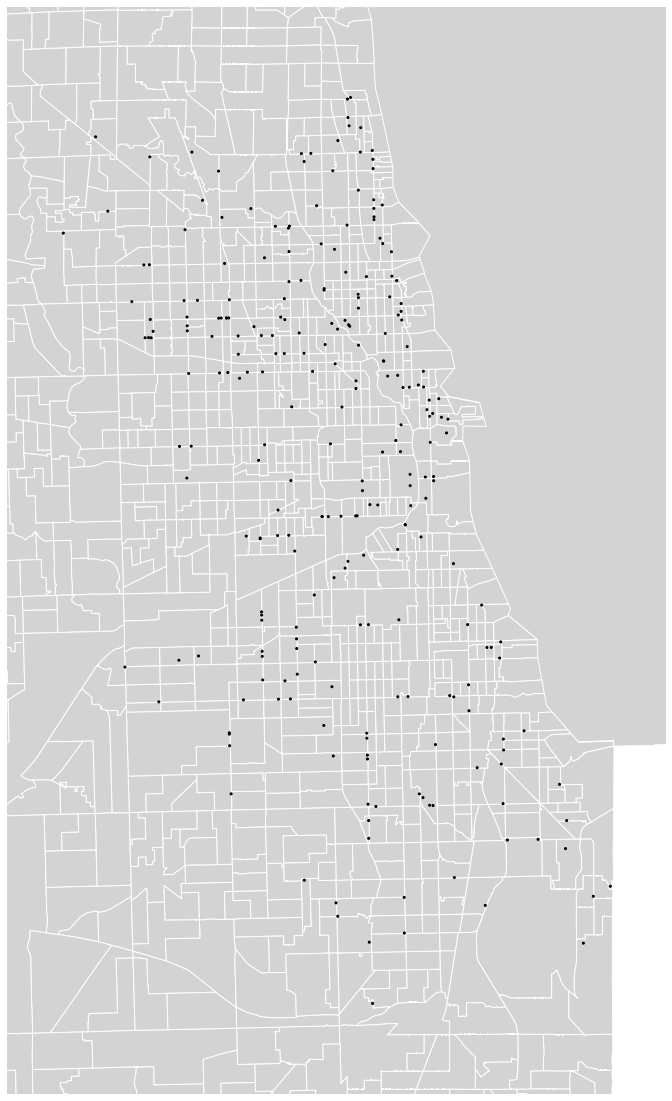

In [7]:
ax = gplt.polyplot(
    census, 
    projection = gcrs.AlbersEqualArea(),
    figsize = (20,20),
    edgecolor = 'white',
    facecolor = 'lightgray')

gplt.pointplot(
    grocery_geo,
    color = 'black',
    ax = ax,
    s = 2,
    )
;

#### Merge the food access with the census tract data

In [8]:
census.drop(columns = ['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10'], inplace = True)

In [9]:
census.rename(columns = {'GEOID10': 'Tract'}, inplace = True)

In [10]:
food_data = pd.read_csv('./data/food_obesity.csv',)
food_data.head()

,Tract,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018
0,17031010100,4854,2302,0,218.0,4.49,0,1,0,1,...,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0,1,33.5
1,17031010201,6450,2463,0,163.0,2.53,0,0,0,0,...,2350.0,299.0,6.0,48.0,1435.0,2049.0,751.0,851.0,1,33.5
2,17031010202,2818,1115,0,315.0,11.18,0,0,0,0,...,953.0,143.0,1.0,18.0,466.0,789.0,464.0,232.0,1,33.5
3,17031010300,6236,2826,0,791.0,12.68,0,1,0,1,...,1722.0,346.0,16.0,21.0,864.0,1169.0,993.0,470.0,1,33.5
4,17031010400,5042,2098,0,1349.0,26.76,0,0,0,0,...,729.0,562.0,5.0,17.0,388.0,480.0,655.0,277.0,1,33.5


In [11]:
food_data.columns

Index(['Tract', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS',
       'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20',
       'LATractsVehicle_20', 'TractLOWI', 'TractKids', 'TractSeniors',
       'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN',
       'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP',
       'Community Area', 'HCSOBP_2016-2018'],
      dtype='object')

In [12]:
# convert food_data['CensusTract'] to a string so the tables can be merged
food_data['Tract']= [str(ct_num) for ct_num in food_data['Tract']]

In [13]:
type(food_data['Tract'][0])

str

In [14]:
food_data_map = census.merge(food_data, on = 'Tract')                  

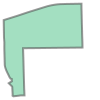

In [15]:
food_data_map['geometry'][0]

In [16]:
food_data_map.head()

,Tract,geometry,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018
0,17031840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950,1173,0,0.0,0.00,0,1,0,...,104.0,706.0,0.0,46.0,1384.0,2495.0,110.0,256.0,59,20.1
1,17031840200,"POLYGON ((-87.64633 41.84009, -87.64632 41.839...",2338,771,0,3.0,0.13,0,0,0,...,55.0,1359.0,1.0,11.0,261.0,491.0,115.0,150.0,60,21.3
2,17031841200,"POLYGON ((-87.68814 41.85569, -87.68816 41.856...",5262,1639,0,1.0,0.02,0,0,0,...,242.0,17.0,7.0,83.0,2573.0,4501.0,478.0,441.0,31,19.9
3,17031838200,"POLYGON ((-87.66782 41.87418, -87.66768 41.874...",1578,441,0,555.0,35.17,0,1,0,...,219.0,405.0,1.0,8.0,216.0,316.0,157.0,31.0,28,24.1
4,17031650301,"POLYGON ((-87.73706 41.77120, -87.73718 41.771...",5711,1501,0,7.0,0.12,0,0,0,...,79.0,27.0,6.0,57.0,1959.0,4504.0,148.0,233.0,65,28.9


The following section is to create a representative point within each Census Tract. Then to create longaitude and latitutde from that the reprsentative point.

In [17]:
food_data_map['repres_point']= food_data_map['geometry'].representative_point()
food_data_map['longitude'] = food_data_map['repres_point'].x
food_data_map['latitude'] = food_data_map['repres_point'].y
food_data_map.head()

,Tract,geometry,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018,repres_point,longitude,latitude
0,17031840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950,1173,0,0.0,0.00,0,1,0,...,46.0,1384.0,2495.0,110.0,256.0,59,20.1,POINT (-87.68590 41.82998),-87.685899,41.829980
1,17031840200,"POLYGON ((-87.64633 41.84009, -87.64632 41.839...",2338,771,0,3.0,0.13,0,0,0,...,11.0,261.0,491.0,115.0,150.0,60,21.3,POINT (-87.65039 41.84378),-87.650394,41.843778
2,17031841200,"POLYGON ((-87.68814 41.85569, -87.68816 41.856...",5262,1639,0,1.0,0.02,0,0,0,...,83.0,2573.0,4501.0,478.0,441.0,31,19.9,POINT (-87.68326 41.85566),-87.683262,41.855657
3,17031838200,"POLYGON ((-87.66782 41.87418, -87.66768 41.874...",1578,441,0,555.0,35.17,0,1,0,...,8.0,216.0,316.0,157.0,31.0,28,24.1,POINT (-87.67509 41.87056),-87.675094,41.870564
4,17031650301,"POLYGON ((-87.73706 41.77120, -87.73718 41.771...",5711,1501,0,7.0,0.12,0,0,0,...,57.0,1959.0,4504.0,148.0,233.0,65,28.9,POINT (-87.73000 41.77493),-87.729996,41.774931


Drop the geometry column and write the data to csv. The latitude and longitude data will be used to calculate the distance of the closest supermarket in an environment that is not limited by geopandas.

In [18]:
food_data_map.drop(columns = 'geometry').to_csv('./data/food_data_map.csv')


In [19]:
# ax = gplt.polyplot(
#     census, 
#     projection = gcrs.AlbersEqualArea(),
#     figsize = (20,20),
#     edgecolor = 'white',
#     facecolor = 'lightgray')

# gplt.pointplot(
#     food_data_map,
#     hue = 'Pop2010',
#     ax = ax,
#     cmap = 'Blues',
#     scheme = 'quantiles',
#     scale = 'Pop2010',
#     limits = (2, 20),
#     legend = True,
#     legend_var = 'hue',

# )
# ;

In [20]:
food_data_geo = census.merge(food_data, on = 'Tract', )
food_data_geo.head()

,Tract,geometry,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018
0,17031840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950,1173,0,0.0,0.00,0,1,0,...,104.0,706.0,0.0,46.0,1384.0,2495.0,110.0,256.0,59,20.1
1,17031840200,"POLYGON ((-87.64633 41.84009, -87.64632 41.839...",2338,771,0,3.0,0.13,0,0,0,...,55.0,1359.0,1.0,11.0,261.0,491.0,115.0,150.0,60,21.3
2,17031841200,"POLYGON ((-87.68814 41.85569, -87.68816 41.856...",5262,1639,0,1.0,0.02,0,0,0,...,242.0,17.0,7.0,83.0,2573.0,4501.0,478.0,441.0,31,19.9
3,17031838200,"POLYGON ((-87.66782 41.87418, -87.66768 41.874...",1578,441,0,555.0,35.17,0,1,0,...,219.0,405.0,1.0,8.0,216.0,316.0,157.0,31.0,28,24.1
4,17031650301,"POLYGON ((-87.73706 41.77120, -87.73718 41.771...",5711,1501,0,7.0,0.12,0,0,0,...,79.0,27.0,6.0,57.0,1959.0,4504.0,148.0,233.0,65,28.9


/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


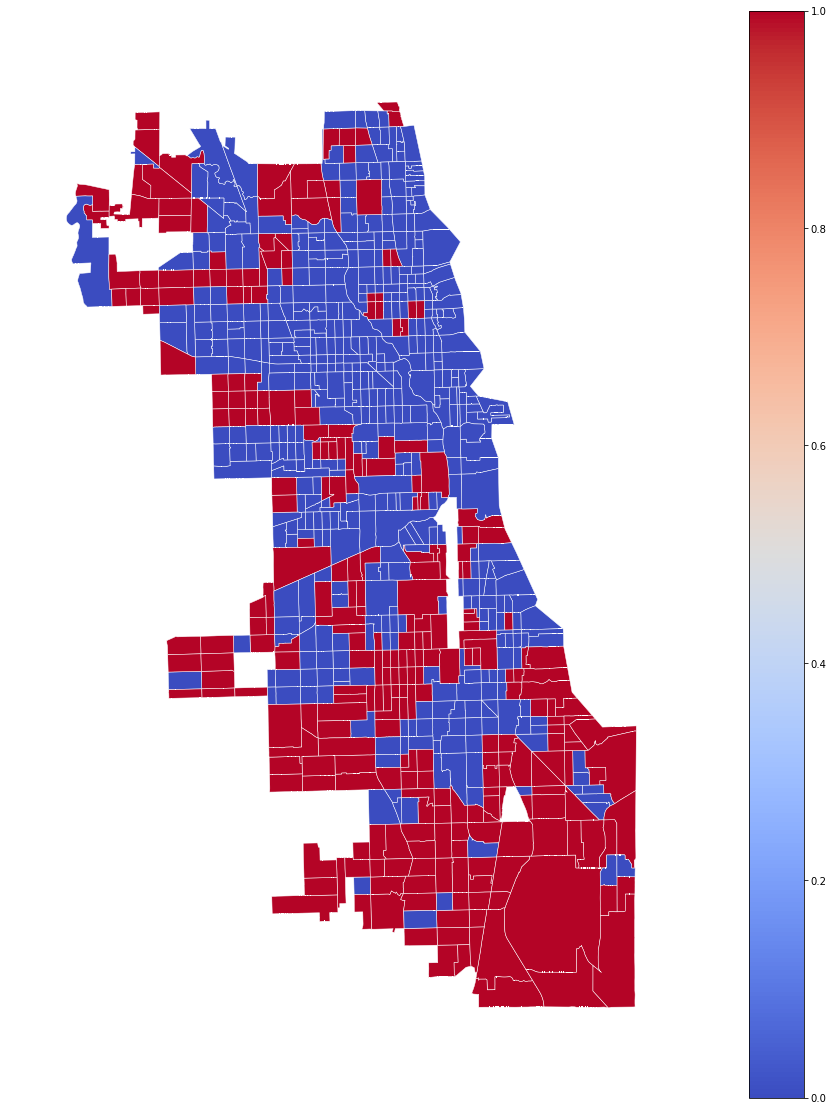

In [21]:
ax = gplt.choropleth(
    food_data_geo,
    hue = 'LATracts_half',
    projection = gcrs.AlbersEqualArea(),
    figsize = (20,20),
    legend = True,
    cmap = 'coolwarm', linewidth = 0.5, edgecolor = 'white'
)



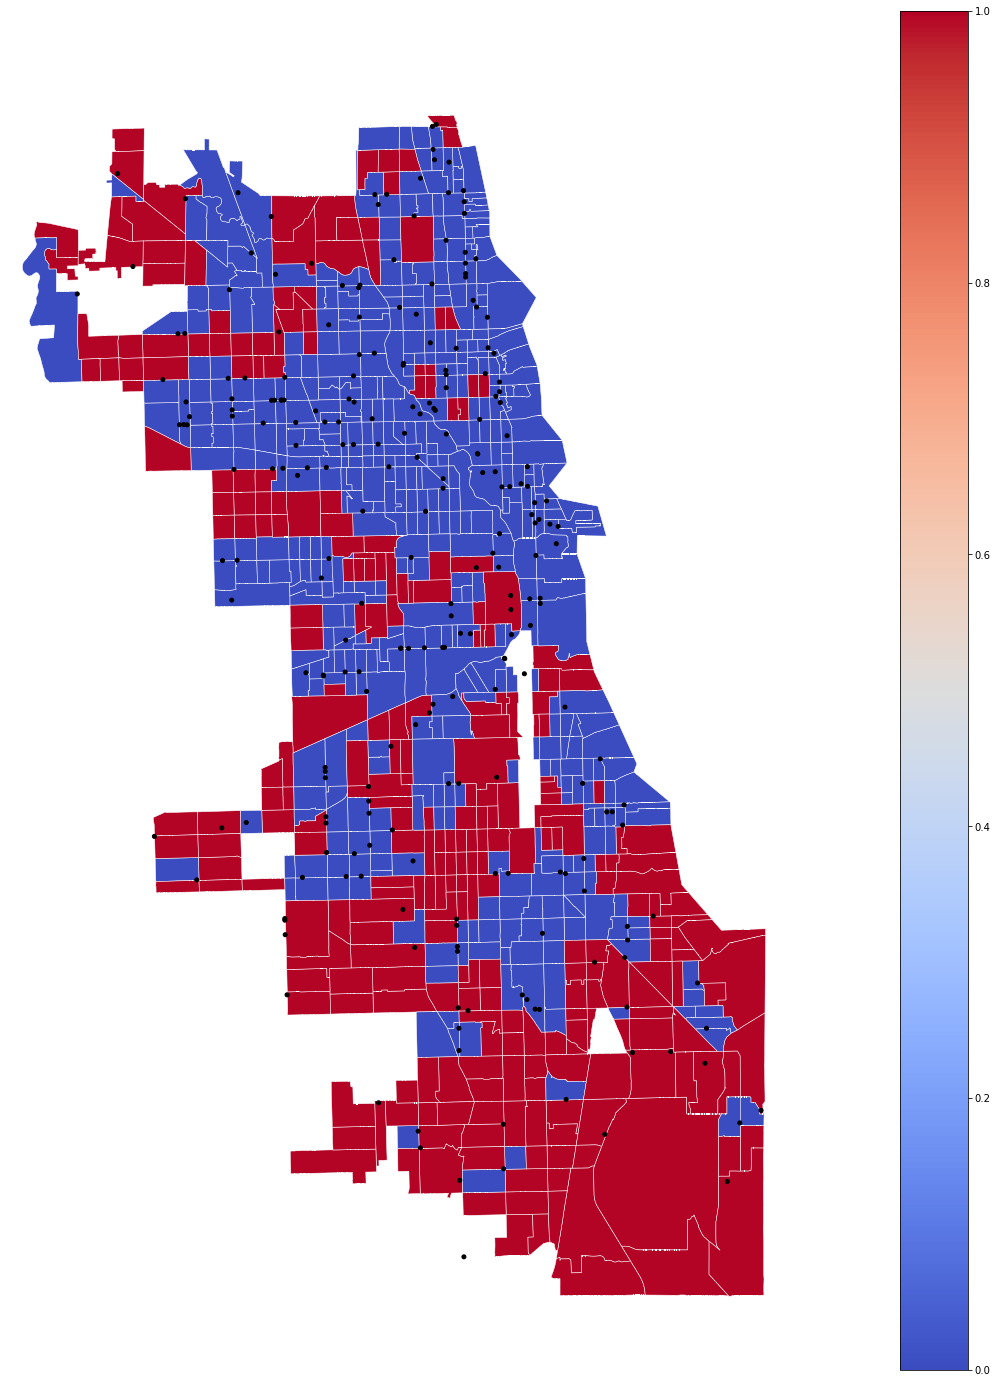

In [22]:
ax = gplt.choropleth(
    food_data_geo,
    hue = 'LATracts_half',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
    
)

gplt.pointplot(
    grocery_geo, # includes more data then on food data; need to merge it down.
    color = 'black',
    ax = ax,
    s = 4,
    zorder = 2,
);

The code below calculates the distance to the grocery store nearest to each census tract. This [resource](https://stackoverflow.com/questions/30740046/calculate-distance-to-nearest-feature-with-geopandas) was very helpful in creating the code.

In [23]:
min_dist = np.empty(len(food_data_geo))
for i, point in enumerate(food_data_geo['geometry']):
    min_dist[i] = np.min([point.distance(store) for store in grocery_geo['geometry']])
food_data_geo['min_dist_to_store'] = min_dist

In [29]:
farthest_tract = food_data_geo[food_data_geo['min_dist_to_store'] == np.max(food_data_geo['min_dist_to_store'])].index

/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


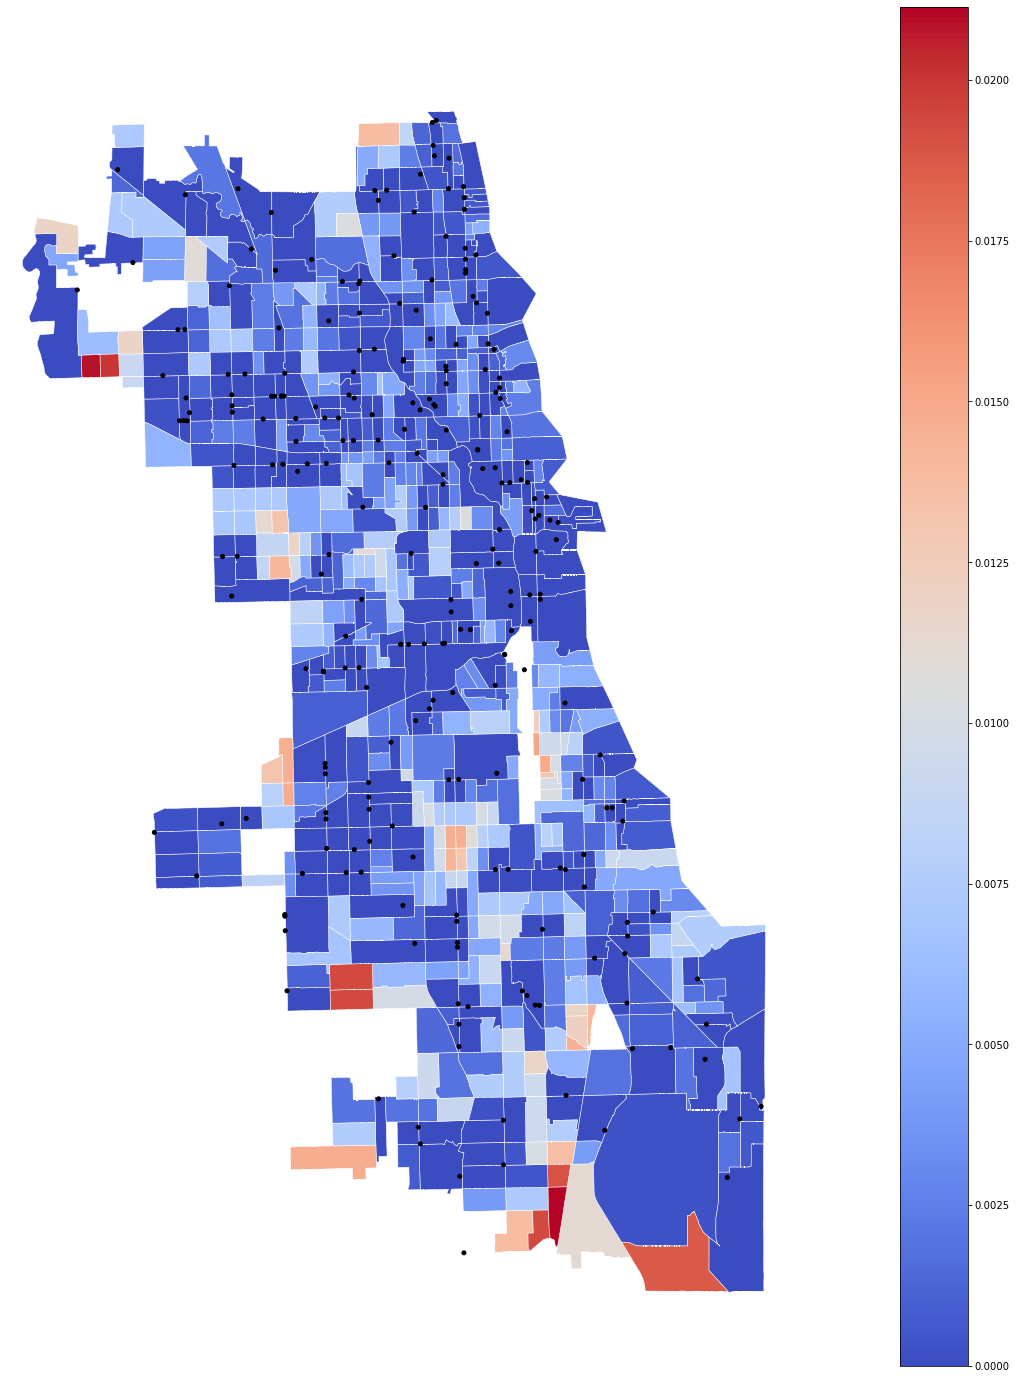

In [30]:
ax = gplt.choropleth(
    food_data_geo.drop(farthest_tract),
    hue = 'min_dist_to_store',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

gplt.pointplot(
    grocery_geo, # includes more data than on food data; need to merge it down.
    color = 'black',
    ax = ax,
    s = 4,
    zorder = 2,
);